# Visualize Mean, Standard Deviation, and Coefficient of Variation

Run 20200201_Get_MSDCV_scalar.ipynb for each model. Then, use this program to plot the mean, standard deviation, and coefficient of variation across all runs.

In [1]:
import numpy as np
from jupyterthemes import jtplot
# jtplot.style('default')
jtplot.style()
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [4]:
def get_fp_plot(model_name, model_figure_title, test_conditions, msdcv, results_dir):
    all_iters = [0, 200, 400, 1600, 6400, 6400, 102400, 204800, 409600, 819200, 1000000, 1228800, 1638400, 2000000, 3000000]#, 4000000, 5000000, 6000000]
    iters = [3000000]
    iter_indices = [i for i, iteration in enumerate(all_iters) if iteration in iters]
    max_blobs = 9
    min_blobs = 1
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(3.6*2, 3.6)) # 3.7*3
    from matplotlib.ticker import MaxNLocator
    plt.xticks(np.arange(min_blobs, max_blobs+1, step=1))
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
    numerosity = np.arange(min_blobs, max_blobs+1)

    ax[0].set_title("Mean")
    ax[0].set_xlabel("Stimulus Numerosity")
    ax[0].set_ylabel("Numerosity Estimate")
    ax[0].set_yticks(np.arange(min_blobs, max_blobs+1, step=1))
    ax[0].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
    ax[0].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

    ax[1].set_title("Standard Deviation")
    ax[1].set_xlabel("Stimulus Numerosity")
    ax[1].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
    ax[1].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

    # ax[2].set_title("Coefficient of Variation")
    # ax[2].set_xlabel("Stimulus Numerosity")
    # # ax[2].set_yticks(np.arange(0, 1, step=0.02))
    # ax[2].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
    # ax[2].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

    for i in iter_indices:
        mean = msdcv[i,min_blobs-1:max_blobs,0]
        sd = msdcv[i,min_blobs-1:max_blobs,1]
        cv = msdcv[i,min_blobs-1:max_blobs,2]

        ax[0].plot(numerosity, mean, c='m', label='N')
        ax[1].plot(numerosity, sd, c='g', label='SD')
        ax[1].plot(numerosity, cv, c='b', label='CV')
        ax[1].legend()

    # legend = ax[i, 1].legend()
    fig.tight_layout()    
    fig.suptitle("Final Performance: %s" % model_figure_title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(results_dir + model_name + '.png')
    plt.show()

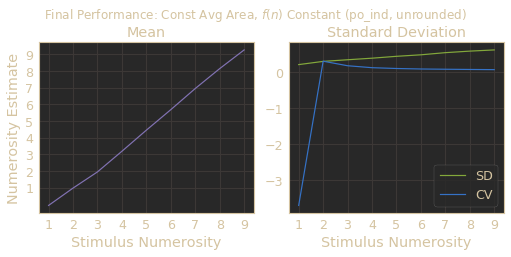

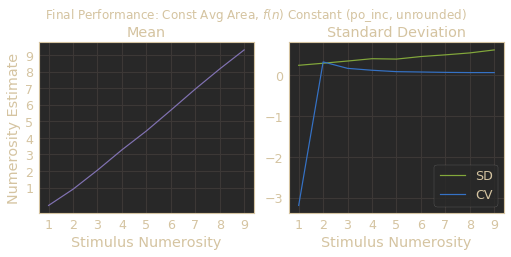

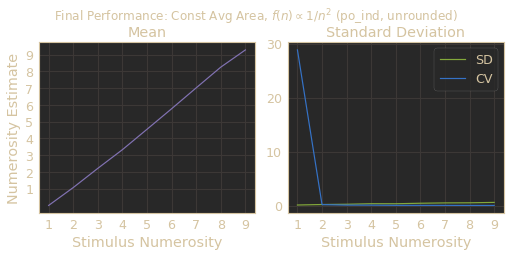

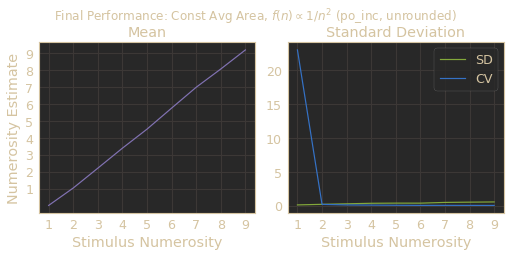

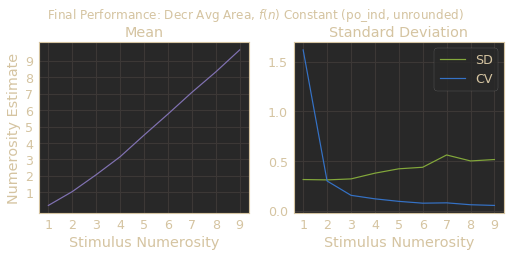

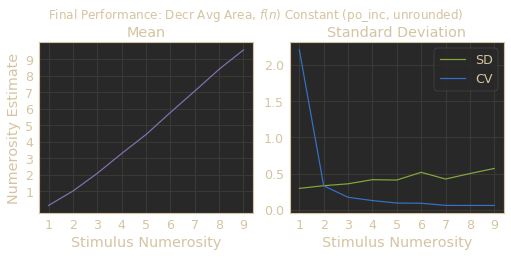

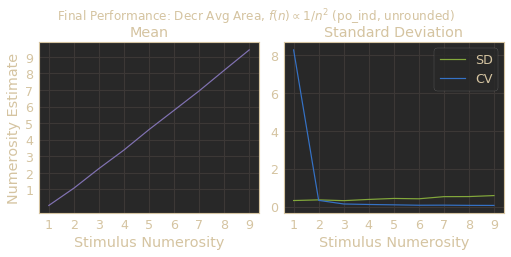

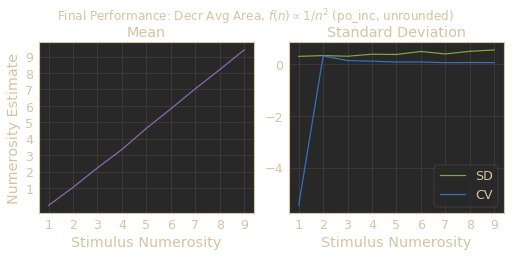

In [16]:
models = [("New_CAA_const_fN_scalar", "Const Avg Area, $f(n)$ Constant"),
          ("New_CAA_decrs_fN_scalar", "Const Avg Area, $f(n) \propto 1/n^2$"),
          ("New_DAA_const_fN_scalar", "Decr Avg Area, $f(n)$ Constant"),
          ("New_DAA_decrs_fN_scalar", "Decr Avg Area, $f(n) \propto 1/n^2$")]
test_conditions = ["po_ind", "po_inc"]

for model in models:
    model_name, model_figure_title = model
    for test_condition in test_conditions:
        data_directory = "data/" + model_name + "/" + test_condition + "/"
        msdcv = np.load(data_directory + "unrounded_msdcv.npy")

        from pathlib import Path
        results_dir = 'Results/20200307_msdcv_3000000_scalar/unrounded/' + test_condition + "/" 
        Path(results_dir).mkdir(parents=True, exist_ok=True)

        get_fp_plot(model_name,
                    '%s (%s, unrounded)' % (model_figure_title,test_condition),
                    test_conditions, msdcv, results_dir)

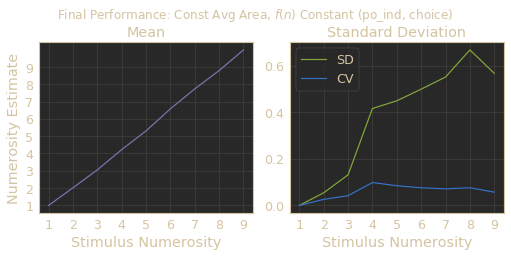

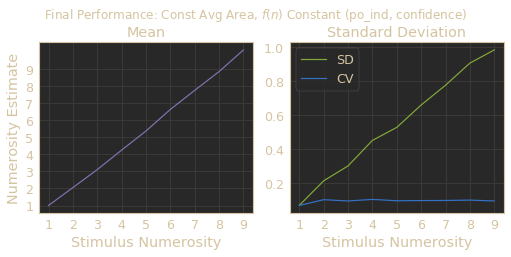

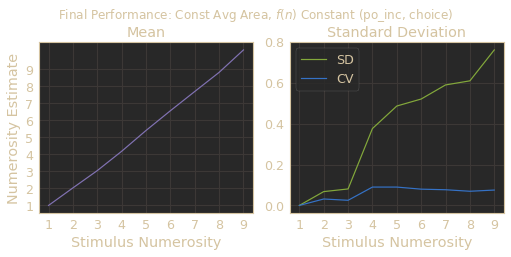

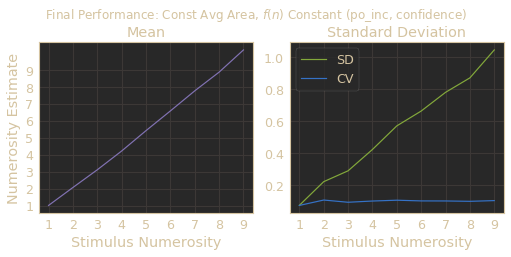

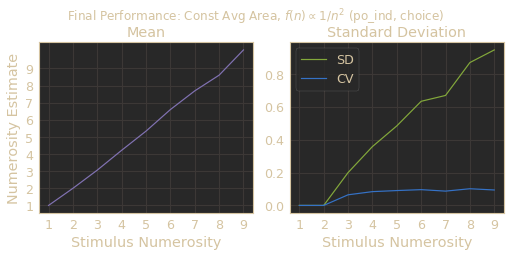

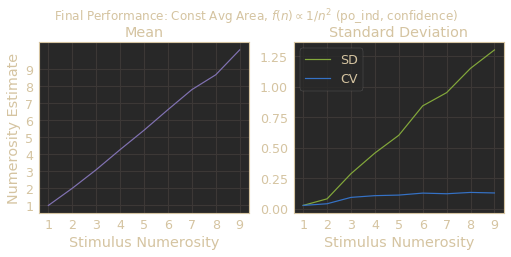

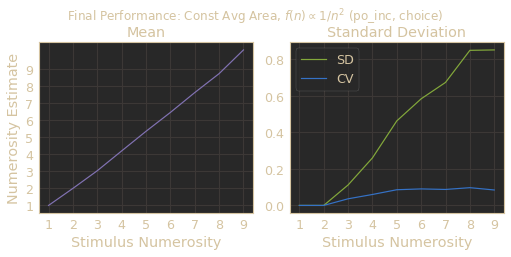

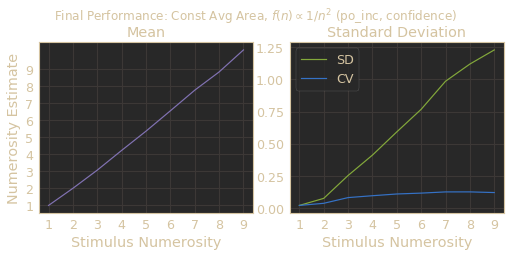

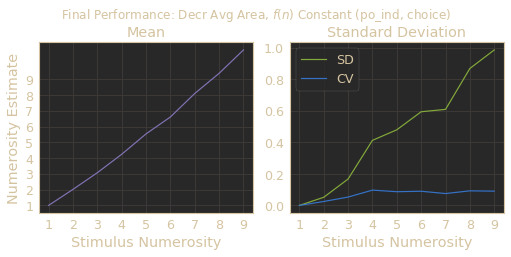

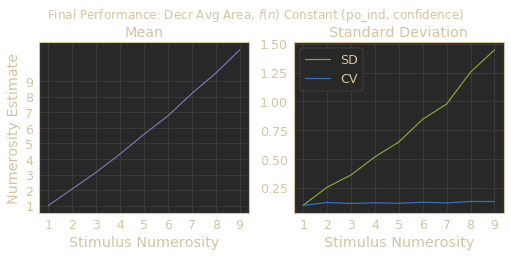

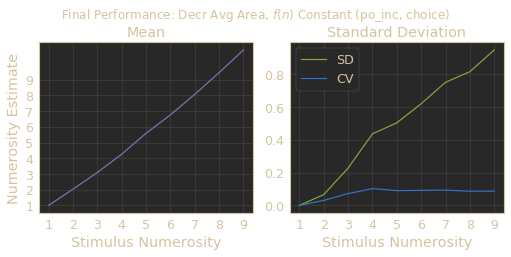

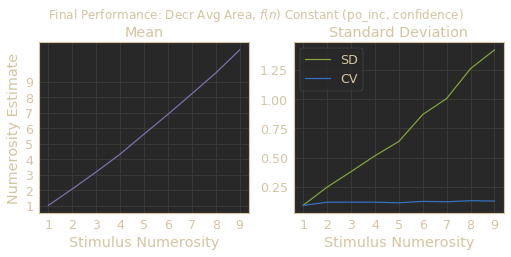

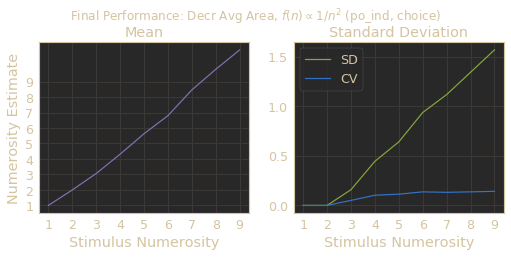

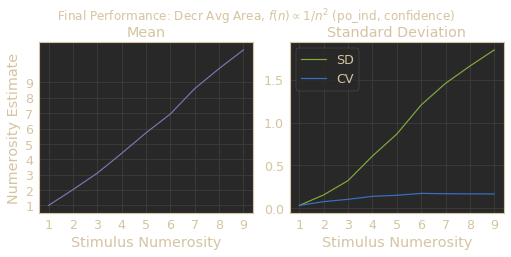

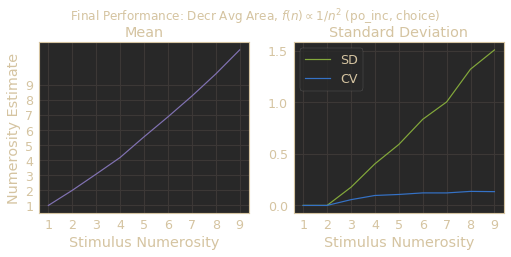

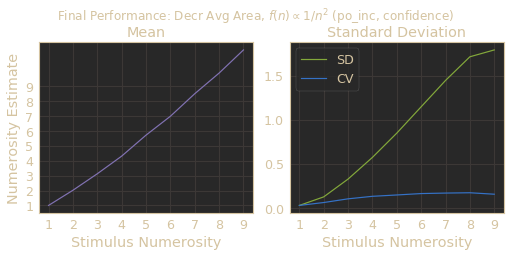

In [17]:
models = [("New_CAA_const_fN", "Const Avg Area, $f(n)$ Constant"),
          ("New_CAA_decrs_fN", "Const Avg Area, $f(n) \propto 1/n^2$"),
          ("New_DAA_const_fN", "Decr Avg Area, $f(n)$ Constant"),
          ("New_DAA_decrs_fN", "Decr Avg Area, $f(n) \propto 1/n^2$")]
test_conditions = ["po_ind", "po_inc"]
histogram_types = ["choice", "confidence"]

for model in models:
    model_name, model_figure_title = model
    for test_condition in test_conditions:
        for histogram_type in histogram_types:
            data_directory = "data/" + model_name + "/" + test_condition + "/"
            msdcv = np.load(data_directory + histogram_type + "_msdcv.npy")

            from pathlib import Path
            results_dir = 'Results/20200307_msdcv_3000000_classifier/%s/%s/' \
                % (histogram_type, test_condition)
            Path(results_dir).mkdir(parents=True, exist_ok=True)

            get_fp_plot(model_name,
                        '%s (%s, %s)' % (model_figure_title,test_condition, histogram_type),
                        test_conditions, msdcv, results_dir)